Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Qualidade de Dados em Saúde para IA**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG,

**Aluno: Fábio C. Simões**

Mais informações: https://ciia-saude.medicina.ufmg.br/

**Manipulação, seleção, filtros, duplicados e nulos**

* Seleção e filtros
* Verificação de registros duplicados
* Tratamento de casos nulos
* Salvando a base de dados corrigida

In [1]:
# Importar as bibliotecas para trabalhar com base de dados e gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Base de dados BD_TEMPO.CSV**

In [3]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/qds/BD_TEMPO.csv'

In [ ]:
#  *********************  VAI DAR ERRO  ****************************

# Existem funções específicas para abrir cada tipo de arquivo
# Por exemplo:

# Ler os dados de um arquivo CSV
dados = pd.read_csv(arquivo)

# Ler os dados de um arquivo JSON
# dados = pd.read_json(arquivo)

# Ler os dados de um arquivo XML
# dados = pd.read_xml(arquivo)

# Ler os dados de um arquivo Excel
# dados = pd.read_excel(arquivo)

Perceba que os dados foram importados todos juntos em uma única coluna. Mesmo nunca tendo aberto essa tabela, é possível perceber que parece ter algo errado nessa importação.

**Algumas dicas que podem ajudar:**

*   Veja se o arquivo usa a vírgula, ou ponto-virgula, ou outro caracter para separar os dados.
*   Veja se o arquivo inicial já na primeira linha com os nomes das colunas, ou direto com os dados, ou ainda se tem linhas extras de texto no inicio ou no  fim do arquivo.
*   Se a acentuação ficar com caracteres especiais, veja se usar um outro tipo de codificação de importação, não pode ajudar.


In [4]:
# Importar o arquivo, e forçar usar um separador específico (;)
dados = pd.read_csv(arquivo, sep=';')
dados

,Dados sobre o clima,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
1,sol,85,85,"18,5",FALSO,não,"R$ 78,25",04/09/2020,15/01/2021
2,sol,80,90,19,VERDADEIRO,não,"R$ 48,90",24/08/2020,15/01/2021
3,nublado,83,86,"18,6",FALSO,sim,"R$ 42,56",18/08/2020,18/08/2020
4,chuva,70,NaN,"15,5",FALSO,sim,R$ 42.0,21/08/2020,21/08/2020
5,chuva,68,80,18,FALSO,sim,"R$ 48,60",08/09/2020,08/09/2020
6,chuva,65,70,17,VERDADEIRO,não,"79,5",20/08/2020,13/01/2021
7,menos,64,65,"16,5",VERDADEIRO,sim,"3,5",25/08/2020,25/08/2020
8,sol,1220,95,"19,5",FALSO,não,"45,6",20/08/2020,24/03/2021
9,sol,69,70,17,FALSO,sim,R$ 45,28/08/2020,28/08/2020


In [5]:
# Importar o arquivo, e forçar que pule a importação da primeira linha, ou de um conjunto de linhas
dados = pd.read_csv(arquivo, sep=';', skiprows=1)

print(dados.info())

dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aparencia     14 non-null     object 
 1   Temperatura   14 non-null     float64
 2   Umidade       13 non-null     float64
 3   Vento         14 non-null     object 
 4   Polen         13 non-null     object 
 5   Jogar         14 non-null     object 
 6   Impacto       14 non-null     object 
 7   DataPrevista  14 non-null     object 
 8   DataJogo      14 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.9+ KB
None


,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
0,sol,85.0,85.0,"18,5",FALSO,não,"R$ 78,25",04/09/2020,15/01/2021
1,sol,80.0,90.0,19,VERDADEIRO,não,"R$ 48,90",24/08/2020,15/01/2021
2,nublado,83.0,86.0,"18,6",FALSO,sim,"R$ 42,56",18/08/2020,18/08/2020
3,chuva,70.0,NaN,"15,5",FALSO,sim,R$ 42.0,21/08/2020,21/08/2020
4,chuva,68.0,80.0,18,FALSO,sim,"R$ 48,60",08/09/2020,08/09/2020
5,chuva,65.0,70.0,17,VERDADEIRO,não,"79,5",20/08/2020,13/01/2021
6,menos,64.0,65.0,"16,5",VERDADEIRO,sim,"3,5",25/08/2020,25/08/2020
7,sol,1220.0,95.0,"19,5",FALSO,não,"45,6",20/08/2020,24/03/2021
8,sol,69.0,70.0,17,FALSO,sim,R$ 45,28/08/2020,28/08/2020
9,chuva,75.0,200.0,20,NaN,sim,"R$ 45,70",31/08/2020,31/08/2020


In [6]:
# Importar o arquivo, e forçar usar um outro tipo de codificação

# codificação = latin1 / utf8 / cp1252 / outra codificação ???   procurar na internet

dados = pd.read_csv(arquivo, sep=';', skiprows=1, encoding='latin1')
dados

,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
0,sol,85.0,85.0,"18,5",FALSO,nÃ£o,"R$ 78,25",04/09/2020,15/01/2021
1,sol,80.0,90.0,19,VERDADEIRO,nÃ£o,"R$ 48,90",24/08/2020,15/01/2021
2,nublado,83.0,86.0,"18,6",FALSO,sim,"R$ 42,56",18/08/2020,18/08/2020
3,chuva,70.0,NaN,"15,5",FALSO,sim,R$ 42.0,21/08/2020,21/08/2020
4,chuva,68.0,80.0,18,FALSO,sim,"R$ 48,60",08/09/2020,08/09/2020
5,chuva,65.0,70.0,17,VERDADEIRO,nÃ£o,"79,5",20/08/2020,13/01/2021
6,menos,64.0,65.0,"16,5",VERDADEIRO,sim,"3,5",25/08/2020,25/08/2020
7,sol,1220.0,95.0,"19,5",FALSO,nÃ£o,"45,6",20/08/2020,24/03/2021
8,sol,69.0,70.0,17,FALSO,sim,R$ 45,28/08/2020,28/08/2020
9,chuva,75.0,200.0,20,NaN,sim,"R$ 45,70",31/08/2020,31/08/2020


In [7]:
# Você pode também optar por ler apenas algumas colunas
dados = pd.read_csv(arquivo, sep=";", skiprows=1)
dados

,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
0,sol,85.0,85.0,"18,5",FALSO,não,"R$ 78,25",04/09/2020,15/01/2021
1,sol,80.0,90.0,19,VERDADEIRO,não,"R$ 48,90",24/08/2020,15/01/2021
2,nublado,83.0,86.0,"18,6",FALSO,sim,"R$ 42,56",18/08/2020,18/08/2020
3,chuva,70.0,NaN,"15,5",FALSO,sim,R$ 42.0,21/08/2020,21/08/2020
4,chuva,68.0,80.0,18,FALSO,sim,"R$ 48,60",08/09/2020,08/09/2020
5,chuva,65.0,70.0,17,VERDADEIRO,não,"79,5",20/08/2020,13/01/2021
6,menos,64.0,65.0,"16,5",VERDADEIRO,sim,"3,5",25/08/2020,25/08/2020
7,sol,1220.0,95.0,"19,5",FALSO,não,"45,6",20/08/2020,24/03/2021
8,sol,69.0,70.0,17,FALSO,sim,R$ 45,28/08/2020,28/08/2020
9,chuva,75.0,200.0,20,NaN,sim,"R$ 45,70",31/08/2020,31/08/2020


In [8]:
# Apaga apenas as linhas com todas as coluna com valores vazios (null)
dados = dados.dropna(how = 'all')
dados

,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
0,sol,85.0,85.0,"18,5",FALSO,não,"R$ 78,25",04/09/2020,15/01/2021
1,sol,80.0,90.0,19,VERDADEIRO,não,"R$ 48,90",24/08/2020,15/01/2021
2,nublado,83.0,86.0,"18,6",FALSO,sim,"R$ 42,56",18/08/2020,18/08/2020
3,chuva,70.0,NaN,"15,5",FALSO,sim,R$ 42.0,21/08/2020,21/08/2020
4,chuva,68.0,80.0,18,FALSO,sim,"R$ 48,60",08/09/2020,08/09/2020
5,chuva,65.0,70.0,17,VERDADEIRO,não,"79,5",20/08/2020,13/01/2021
6,menos,64.0,65.0,"16,5",VERDADEIRO,sim,"3,5",25/08/2020,25/08/2020
7,sol,1220.0,95.0,"19,5",FALSO,não,"45,6",20/08/2020,24/03/2021
8,sol,69.0,70.0,17,FALSO,sim,R$ 45,28/08/2020,28/08/2020
9,chuva,75.0,200.0,20,NaN,sim,"R$ 45,70",31/08/2020,31/08/2020


In [9]:
# Contabilizar uma categoria para testar
dados.Impacto.value_counts()

Impacto
R$ 78,25        1
R$ 48,90        1
R$ 42,56        1
    R$ 42.0     1
R$ 48,60        1
79,5            1
3,5             1
45,6            1
R$ 45           1
R$ 45,70        1
R$ 45,80        1
    R$ 42.9     1
    R$ 47.85    1
26.8            1
Name: count, dtype: int64

In [12]:
# Remove espaços em branco no início e no fim do texto de uma célula
dados.loc[:, 'Impacto'] = dados['Impacto'].str.strip()

# Contabiliza uma categoria para testar
dados['Impacto'].value_counts()


Impacto
R$ 78,25    1
R$ 48,90    1
R$ 42,56    1
R$ 42.0     1
R$ 48,60    1
79,5        1
3,5         1
45,6        1
R$ 45       1
R$ 45,70    1
R$ 45,80    1
R$ 42.9     1
R$ 47.85    1
26.8        1
Name: count, dtype: int64

In [14]:
# Remover um prefixo nos dados
dados.loc[:, 'Impacto'] = dados['Impacto'].str.removeprefix("R$ ")

# Conferir
dados['Impacto'].value_counts()


Impacto
78,25    1
48,90    1
42,56    1
42.0     1
48,60    1
79,5     1
3,5      1
45,6     1
45       1
45,70    1
45,80    1
42.9     1
47.85    1
26.8     1
Name: count, dtype: int64

In [16]:
# Substituir ',' por '.'
dados.loc[:, 'Impacto'] = dados['Impacto'].str.replace(',', '.')

# Conferir
dados['Impacto'].value_counts()


Impacto
78.25    1
48.90    1
42.56    1
42.0     1
48.60    1
79.5     1
3.5      1
45.6     1
45       1
45.70    1
45.80    1
42.9     1
47.85    1
26.8     1
Name: count, dtype: int64

In [17]:
# informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aparencia     14 non-null     object 
 1   Temperatura   14 non-null     float64
 2   Umidade       13 non-null     float64
 3   Vento         14 non-null     object 
 4   Polen         13 non-null     object 
 5   Jogar         14 non-null     object 
 6   Impacto       14 non-null     object 
 7   DataPrevista  14 non-null     object 
 8   DataJogo      14 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.1+ KB


In [ ]:
# converter uma coluna texto para numerico (se tiver numeros e textos misturados)
# dados['Vento'] = pd.to_numeric(dados['Vento'], errors='coerce')

# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input.

In [19]:
# Converter o formato da coluna toda para um valor numérico
dados.loc[:, 'Impacto'] = pd.to_numeric(dados['Impacto'], errors='coerce')

# Conferir
dados['Impacto'].value_counts()


Impacto
78.25    1
48.90    1
42.56    1
42.00    1
48.60    1
79.50    1
3.50     1
45.60    1
45.00    1
45.70    1
45.80    1
42.90    1
47.85    1
26.80    1
Name: count, dtype: int64

In [20]:
# informações do dataset
print(dados.info())
dados

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aparencia     14 non-null     object 
 1   Temperatura   14 non-null     float64
 2   Umidade       13 non-null     float64
 3   Vento         14 non-null     object 
 4   Polen         13 non-null     object 
 5   Jogar         14 non-null     object 
 6   Impacto       14 non-null     float64
 7   DataPrevista  14 non-null     object 
 8   DataJogo      14 non-null     object 
dtypes: float64(3), object(6)
memory usage: 1.1+ KB
None


,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
0,sol,85.0,85.0,"18,5",FALSO,não,78.25,04/09/2020,15/01/2021
1,sol,80.0,90.0,19,VERDADEIRO,não,48.90,24/08/2020,15/01/2021
2,nublado,83.0,86.0,"18,6",FALSO,sim,42.56,18/08/2020,18/08/2020
3,chuva,70.0,NaN,"15,5",FALSO,sim,42.00,21/08/2020,21/08/2020
4,chuva,68.0,80.0,18,FALSO,sim,48.60,08/09/2020,08/09/2020
5,chuva,65.0,70.0,17,VERDADEIRO,não,79.50,20/08/2020,13/01/2021
6,menos,64.0,65.0,"16,5",VERDADEIRO,sim,3.50,25/08/2020,25/08/2020
7,sol,1220.0,95.0,"19,5",FALSO,não,45.60,20/08/2020,24/03/2021
8,sol,69.0,70.0,17,FALSO,sim,45.00,28/08/2020,28/08/2020
9,chuva,75.0,200.0,20,NaN,sim,45.70,31/08/2020,31/08/2020


In [26]:
# Substituir ',' por '.' apenas nas entradas de texto
dados.loc[:, 'Vento'] = dados['Vento'].astype(str).apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Converter o formato da coluna toda para um valor numérico
dados.loc[:, 'Vento'] = pd.to_numeric(dados['Vento'], errors='coerce')

# Conferir
dados['Vento'].value_counts()





Vento
17.0    3
19.0    2
18.5    1
18.6    1
15.5    1
18.0    1
16.5    1
19.5    1
20.0    1
17.5    1
9.1     1
Name: count, dtype: int64

In [27]:
# conferir
print(dados.info())
dados

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aparencia     14 non-null     object 
 1   Temperatura   14 non-null     float64
 2   Umidade       13 non-null     float64
 3   Vento         14 non-null     object 
 4   Polen         13 non-null     object 
 5   Jogar         14 non-null     object 
 6   Impacto       14 non-null     float64
 7   DataPrevista  14 non-null     object 
 8   DataJogo      14 non-null     object 
dtypes: float64(3), object(6)
memory usage: 1.1+ KB
None


,Aparencia,Temperatura,Umidade,Vento,Polen,Jogar,Impacto,DataPrevista,DataJogo
0,sol,85.0,85.0,18.5,FALSO,não,78.25,04/09/2020,15/01/2021
1,sol,80.0,90.0,19.0,VERDADEIRO,não,48.90,24/08/2020,15/01/2021
2,nublado,83.0,86.0,18.6,FALSO,sim,42.56,18/08/2020,18/08/2020
3,chuva,70.0,NaN,15.5,FALSO,sim,42.00,21/08/2020,21/08/2020
4,chuva,68.0,80.0,18.0,FALSO,sim,48.60,08/09/2020,08/09/2020
5,chuva,65.0,70.0,17.0,VERDADEIRO,não,79.50,20/08/2020,13/01/2021
6,menos,64.0,65.0,16.5,VERDADEIRO,sim,3.50,25/08/2020,25/08/2020
7,sol,1220.0,95.0,19.5,FALSO,não,45.60,20/08/2020,24/03/2021
8,sol,69.0,70.0,17.0,FALSO,sim,45.00,28/08/2020,28/08/2020
9,chuva,75.0,200.0,20.0,NaN,sim,45.70,31/08/2020,31/08/2020


<Axes: ylabel='count'>

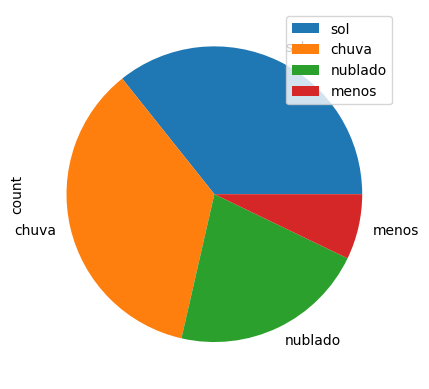

In [28]:
# Gráfico de pizza, da quantidade de casos

# 1º extrai a tabela resumo com a quantidade por uma categoria
CLIMA = dados.Aparencia.value_counts()

# 2º faz a pizza com a tabela resumo
CLIMA.plot.pie(legend=True)

**Converter Object para o tipo DateTime**

In [29]:
# visualizar os tipos de cada variável
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aparencia     14 non-null     object 
 1   Temperatura   14 non-null     float64
 2   Umidade       13 non-null     float64
 3   Vento         14 non-null     object 
 4   Polen         13 non-null     object 
 5   Jogar         14 non-null     object 
 6   Impacto       14 non-null     float64
 7   DataPrevista  14 non-null     object 
 8   DataJogo      14 non-null     object 
dtypes: float64(3), object(6)
memory usage: 1.1+ KB


In [33]:
# Converter o tipo de uma coluna OBJECT para DATETIME
dados.loc[:, 'DataPrevista'] = pd.to_datetime(dados['DataPrevista'], errors='coerce', format='%d/%m/%Y')

# Verificar informações
dados.info()



<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Aparencia     14 non-null     object        
 1   Temperatura   14 non-null     float64       
 2   Umidade       13 non-null     float64       
 3   Vento         14 non-null     object        
 4   Polen         13 non-null     object        
 5   Jogar         14 non-null     object        
 6   Impacto       14 non-null     float64       
 7   DataPrevista  14 non-null     datetime64[ns]
 8   DataJogo      14 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.1+ KB


In [35]:
# Converter o tipo de uma coluna OBJECT para DATETIME
dados.loc[:, 'DataJogo'] = pd.to_datetime(dados['DataJogo'], errors='coerce')

# Verificar informações
dados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Aparencia     14 non-null     object        
 1   Temperatura   14 non-null     float64       
 2   Umidade       13 non-null     float64       
 3   Vento         14 non-null     object        
 4   Polen         13 non-null     object        
 5   Jogar         14 non-null     object        
 6   Impacto       14 non-null     float64       
 7   DataPrevista  14 non-null     datetime64[ns]
 8   DataJogo      14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 1.1+ KB


In [36]:
# salvar em excel, um novo arquivo, com os dados tratados
dados.to_excel("Roteiro_QDS03_atividade6.xlsx")

# Importando dados de um endereço de internet - URL

In [42]:
import pandas as pd
import csv
from io import StringIO
import requests

# Bases de dados online
# https://dados.gov.br/dados/conjuntos-dados/dados-de-pagamento-do-ressarcimento-ao-sus-por-operadora
url = 'https://dadosabertos.ans.gov.br/FTP/PDA/ressarcimento_ao_SUS_indice_efetivo_pagamento/202304_Indice_de_Efetivo_Pagamento.csv'

# Baixar o conteúdo do CSV
response = requests.get(url)
csv_data = response.text

# Inicializar um leitor CSV
reader = csv.reader(StringIO(csv_data))

# Listas para armazenar linhas válidas
valid_lines = []

# Iterar sobre as linhas e ignorar aquelas com problemas
for i, row in enumerate(reader):
    try:
        # Tente converter cada linha para DataFrame
        df_row = pd.DataFrame([row])
        valid_lines.append(df_row)
    except pd.errors.ParserError as e:
        print(f"Aviso na linha {i + 1}: {e}")

# Concatenar as linhas válidas para formar o DataFrame final
dadosURL = pd.concat(valid_lines, ignore_index=True)

# Exibir as primeiras linhas do DataFrame
dadosURL.head()




,0,1,2,3,4,5,6,7,8,9,10,11,12
0,COMPETENCIA;CODIGO_OPERADORA;RAZAO_SOCIAL;SITU...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2023-04;""421421"";""2care Operadora De SaÃºde Lt...",08;0,00;51725,"48;""83","40%"";43139",08;0,00;51725,"48;""83","40%"";""2023-05-05""",NaN,NaN,NaN,NaN
2,"2023-04;""406708"";""A.P.S AssistÃªncia Personali...",37;0,00;764815,"37;""100","00%"";705409",24;0,00;705409,"24;""100","00%"";""2023-05-05""",NaN,NaN,NaN,NaN
3,"2023-04;""314668"";""Abertta SaÃºde - AssociaÃ§Ã£...",44;33664,10;3297045,"54;""100","00%"";2413015",98;0,00;2413015,"98;""100","00%"";""2023-05-05""",NaN,NaN,NaN,NaN
4,"2023-04;""419168"";""Adpart M2 AdministraÃ§Ã£o E ...",00;244624,90;2202620,"92;""11","23%"";2796",00;244624,90;2202620,"92;""11","23%"";""2023-05-05""",NaN,NaN,NaN,NaN


In [43]:
url = 'https://dadosabertos.ans.gov.br/FTP/PDA/ressarcimento_ao_SUS_indice_efetivo_pagamento/202304_Indice_de_Efetivo_Pagamento.csv'

dadosURL = pd.read_csv(url, sep=';', encoding='utf-8')
dadosURL.head()

,COMPETENCIA,CODIGO_OPERADORA,RAZAO_SOCIAL,SITUACAO_OPERADORA,VALOR_PAGO_ACUMULADO,VALOR_PARCELADO_ACUMULADO,VALOR_COBRADO_ACUMULADO,INDICE_ADIMPLENCIA,VALOR_PAGO_ACUMULADO_5ANOS,VALOR_PARCELADO_ACUMULADO_5ANOS,VALOR_COBRADO_ACUMULADO_5ANOS,INDICE_ADIMPLENCIA_5ANOS,DT_ATUALIZACAO
0,2023-04,421421,2care Operadora De Saúde Ltda.,1,"43139,08","0,00","51725,48","83,40%","43139,08","0,00","51725,48","83,40%",2023-05-05
1,2023-04,406708,A.P.S Assistência Personalizada À Saúde Ltda,1,"764815,37","0,00","764815,37","100,00%","705409,24","0,00","705409,24","100,00%",2023-05-05
2,2023-04,314668,Abertta Saúde - Associação Beneficente Dos Emp...,1,"3263381,44","33664,10","3297045,54","100,00%","2413015,98","0,00","2413015,98","100,00%",2023-05-05
3,2023-04,419168,Adpart M2 Administração E Participações Ltda,1,"2796,00","244624,90","2202620,92","11,23%","2796,00","244624,90","2202620,92","11,23%",2023-05-05
4,2023-04,335657,Advance Planos De Saúde Ltda,1,"1909288,10","0,00","2006162,11","95,17%","1082190,01","0,00","1082190,01","100,00%",2023-05-05
